## Day 3: No Matter How You Slice It 

The Elves managed to locate the chimney-squeeze prototype fabric for Santa's suit (thanks to someone who helpfully wrote its box IDs on the wall of the warehouse in the middle of the night). Unfortunately, anomalies are still affecting them - nobody can even agree on how to **cut** the fabric.

The whole piece of fabric they're working on is a very large square - at least `1000` inches on each side.

Each Elf has made a **claim** about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

- The number of inches between the left edge of the fabric and the left edge of the rectangle.
- The number of inches between the top edge of the fabric and the top edge of the rectangle.
- The width of the rectangle in inches.
- The height of the rectangle in inches.

A claim like `#123 @ 3,2: 5x4` means that claim ID `123` specifies a rectangle `3` inches from the left edge, `2` inches from the top edge, `5̀` inches wide, and `4` inches tall. Visually, it claims the square inches of fabric represented by # (and ignores the square inches of fabric represented by `.`) in the diagram below:
```
...........
...........
...#####...
...#####...
...#####...
...#####...
...........
...........
...........
```


The problem is that many of the claims **overlap**, causing two or more claims to cover part of the same areas. For example, consider the following claims:
```
#1 @ 1,3: 4x4
#2 @ 3,1: 4x4
#3 @ 5,5: 2x2
```
Visually, these claim the following areas:
```
........
...2222.
...2222.
.11XX22.
.11XX22.
.111133.
.111133.
........
```
The four square inches marked with X are claimed by **both** `1` **and** `2`. (Claim `3`, while adjacent to the others, does not overlap either of them.)

If the Elves all proceed with their own plans, none of them will have enough fabric. **How many square inches of fabric are within two or more claims?**

---

First let's read the data again. This one is a bit more complicated with regards to "what's in a line".

We have an ID. We have a `x,y` - coordinate and an `x,y` - extent.

In [83]:
with open("day3.txt") as f:
    content = f.readlines()

content_dict = {}
for x in content:
    id_, data = x.strip().split(" @ ")
    coord, extent = data.split(": ")
    content_dict[int(id_[1:])] = {"coord": [int(x) for x in coord.split(",")], "extent": [int(x) for x in extent.split("x")]}

content_dict

{1: {'coord': [16, 576], 'extent': [17, 14]},
 2: {'coord': [94, 483], 'extent': [29, 26]},
 3: {'coord': [927, 101], 'extent': [19, 22]},
 4: {'coord': [225, 790], 'extent': [27, 10]},
 5: {'coord': [78, 846], 'extent': [14, 12]},
 6: {'coord': [964, 114], 'extent': [19, 28]},
 7: {'coord': [507, 506], 'extent': [22, 10]},
 8: {'coord': [700, 352], 'extent': [26, 16]},
 9: {'coord': [593, 72], 'extent': [14, 22]},
 10: {'coord': [38, 861], 'extent': [19, 10]},
 11: {'coord': [749, 92], 'extent': [28, 17]},
 12: {'coord': [416, 24], 'extent': [21, 13]},
 13: {'coord': [107, 219], 'extent': [25, 25]},
 14: {'coord': [341, 283], 'extent': [20, 12]},
 15: {'coord': [231, 746], 'extent': [29, 29]},
 16: {'coord': [911, 361], 'extent': [19, 14]},
 17: {'coord': [653, 620], 'extent': [18, 15]},
 18: {'coord': [373, 129], 'extent': [29, 21]},
 19: {'coord': [269, 410], 'extent': [23, 11]},
 20: {'coord': [534, 291], 'extent': [13, 11]},
 21: {'coord': [331, 206], 'extent': [22, 28]},
 22: {'c

We need to find the number of square inches that are claimed at least twice. I think it's easiest if we spread out our fabric and draw on it.

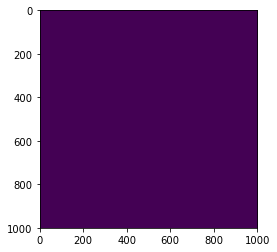

In [41]:
from numpy import zeros
import matplotlib.pyplot as plt
%matplotlib inline

fabric = zeros([1000,1000])
plt.imshow(fabric)

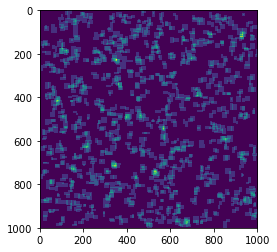

In [43]:
for id_ in content_dict:
    x_coord = content_dict[id_]["coord"][1]
    y_coord = content_dict[id_]["coord"][0]
    x_extent = content_dict[id_]["extent"][1]
    y_extent = content_dict[id_]["extent"][0]
    fabric[x_coord:x_coord+x_extent,y_coord:y_coord+y_extent] += 1

plt.imshow(fabric)

Let's see which claims have more than one claimer.

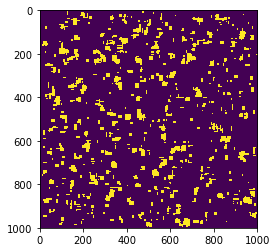

In [44]:
plt.imshow(fabric>1)

Now it's just a question of summing them up!

In [46]:
sum(sum(fabric>1))

111630

## Part Two

Amidst the chaos, you notice that exactly one claim doesn't overlap by even a single square inch of fabric with any other claim. If you can somehow draw attention to it, maybe the Elves will be able to make Santa's suit after all!

For example, in the claims above, only claim 3 is intact after all claims are made.

**What is the ID of the only claim that doesn't overlap?**


--- 

Now we need to look at combinations again. Drawing on the fabric would need a whole lot of chalk, so maybe we can find a *logical* way to look at this. 

Basically we want to see if the start `or` the end of **both** coordinates ar contained within the other.

In [94]:
from itertools import combinations

ids = [key for key in content_dict]
out_dict = content_dict.copy()

for a, b in combinations(ids, 2):
    
    x1 = max(content_dict[a]["coord"][0], content_dict[b]["coord"][0])
    y1 = max(content_dict[a]["coord"][1], content_dict[b]["coord"][1])
    x2 = min(content_dict[a]["coord"][0] + content_dict[a]["extent"][0], content_dict[b]["coord"][0] + content_dict[b]["extent"][0])
    y2 = min(content_dict[a]["coord"][1] + content_dict[a]["extent"][1], content_dict[b]["coord"][1] + content_dict[b]["extent"][1])
    if x1<x2 and y1<y2:
        out_dict.pop(a, None)
        out_dict.pop(b, None)

out_dict

{724: {'coord': [629, 588], 'extent': [10, 11]}}